In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 2:3].values # Considering only Open values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set[:5]

array([[332.83],
       [333.87],
       [330.75],
       [328.77],
       [322.29]])

In [5]:
training_set.size

1258

## Data Preprocessing

In [6]:
# Feature scaling Values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = mc.fit_transform(training_set)

In [7]:
training_set_scaled[:5]

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       [0.08881917],
       [0.07671765]])

In [8]:
# Creating a data structure with 60 timesteps and 1 output =>learn from previous 60 inputs for next output
X_train = []
y_train = []

In [9]:
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0]) # From 0 to 59 
    y_train.append(training_set_scaled[i, 0])  #Output of 0 to 59

X_train, y_train = np.array((X_train)), np.array(y_train)

In [10]:
X_train

array([[0.09640129, 0.09834351, 0.09251685, ..., 0.07903337, 0.08276841,
        0.08751191],
       [0.09834351, 0.09251685, 0.08881917, ..., 0.08276841, 0.08751191,
        0.08564439],
       [0.09251685, 0.08881917, 0.07671765, ..., 0.08751191, 0.08564439,
        0.08274973],
       ...,
       [0.92416008, 0.92909033, 0.93536519, ..., 0.95637477, 0.95529161,
        0.96485331],
       [0.92909033, 0.93536519, 0.93239584, ..., 0.95529161, 0.96485331,
        0.95807422],
       [0.93536519, 0.93239584, 0.93086447, ..., 0.96485331, 0.95807422,
        0.94257381]])

In [11]:
X_train[60,0]

0.08564438717388467

In [12]:
X_train[59,0]

0.08751190542887566

In [13]:
y_train[0]

0.08564438717388467

In [14]:
y_train

array([0.08564439, 0.08274973, 0.07718453, ..., 0.95807422, 0.94257381,
       0.93669113])

In [15]:
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [16]:
X_train.shape

(1198, 60, 1)

In [17]:
X_train

array([[[0.09640129],
        [0.09834351],
        [0.09251685],
        ...,
        [0.07903337],
        [0.08276841],
        [0.08751191]],

       [[0.09834351],
        [0.09251685],
        [0.08881917],
        ...,
        [0.08276841],
        [0.08751191],
        [0.08564439]],

       [[0.09251685],
        [0.08881917],
        [0.07671765],
        ...,
        [0.08751191],
        [0.08564439],
        [0.08274973]],

       ...,

       [[0.92416008],
        [0.92909033],
        [0.93536519],
        ...,
        [0.95637477],
        [0.95529161],
        [0.96485331]],

       [[0.92909033],
        [0.93536519],
        [0.93239584],
        ...,
        [0.95529161],
        [0.96485331],
        [0.95807422]],

       [[0.93536519],
        [0.93239584],
        [0.93086447],
        ...,
        [0.96485331],
        [0.95807422],
        [0.94257381]]])

## Creating RNN

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
#Initializing RNN
regressor = Sequential()

In [20]:
# First LSTM Layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Second Layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Third Layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output Layer
regressor.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
regressor.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [22]:
#Fitting RNN on Training data
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0348 - accuracy: 0.0017
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0068 - accuracy: 0.0017
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0054 - accuracy: 0.0017
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042 - accuracy: 0.0017
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 10/100
1198/1198 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 78/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0019 - accuracy: 0.0017
Epoch 79/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 80/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 81/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 82/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 83/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 84/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 85/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 86/100
1198/1198 [==============================] - 8s 7ms/step - loss:

## Testing

In [23]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 2:3].values

In [24]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [25]:
# Getting the predicted stock price of 2017
# To get previous 60 values to predict as RNN
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = mc.fit_transform(inputs)

In [26]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mc.inverse_transform(predicted_stock_price)

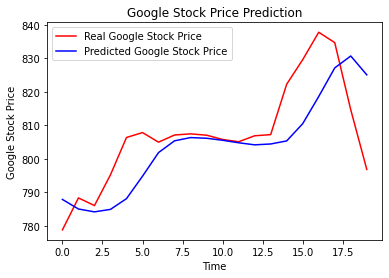

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()